# SYSTEM RUN

In [10]:
%pylab inline
import matplotlib.lines as lines
from shapely.geometry import Polygon

Populating the interactive namespace from numpy and matplotlib


In [11]:
hex_rad = 1
rad_mul = 0.8
sin30 = rad_mul*hex_rad*sin(pi/6)
sin60 = rad_mul*hex_rad*sin(pi/3)
hex_line = [[0, rad_mul*hex_rad], [-sin60, sin30], [-sin60, -sin30], [0, -rad_mul*hex_rad], [sin60, -sin30], [sin60, sin30], 
            [0, rad_mul*hex_rad]]
def hex_flake_step(old_line):
    new_line = []
    for i in range(len(old_line)-1):
        p1 = old_line[i]
        p2 = old_line[i+1]
        dpx = (p2[0] - p1[0])/3.0
        dpy = (p2[1] - p1[1])/3.0
        new_line.append(p1)
        p3 = [p1[0]+dpx, p1[1]+dpy]
        p4 = [p1[0]+2*dpx, p1[1]+2*dpy]
        alpha = pi/3.0
        p = [(p2[0]-p1[0])/3.0, (p2[1]-p1[1])/3.0]
        p5 = [p[0]*cos(alpha) - p[1]*sin(alpha), p[1]*cos(alpha) + p[0]*sin(alpha)]
        p5 = [p5[0] + p3[0], p5[1] + p3[1]]
        new_line.append(p3)
        new_line.append(p5)
        new_line.append(p4)
    new_line.append(old_line[-1])
    new_line = np.array(new_line)
    return new_line

for i in range(0):
    hex_line = hex_flake_step(hex_line)
         

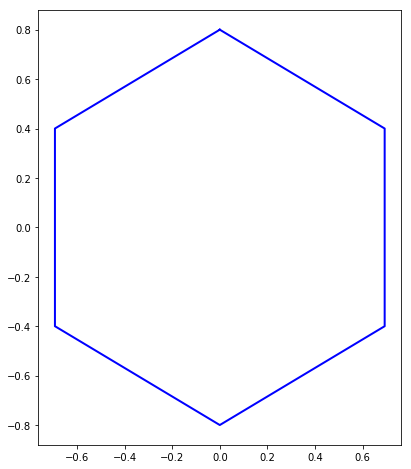

In [9]:
fig, ax = plt.subplots()

fig.set_size_inches(6.5,8)          # Make graph square
#scatter([-0.1],[-0.1],s=0.01)     # Move graph window a little left and down

(line_hex_xs, line_hex_ys) = zip(*hex_line)

ax.add_line(Line2D(line_hex_xs, line_hex_ys, linewidth=2, color='blue'))
plot()
show()


In [30]:
len(hex_line)

97

In [31]:
import hoomd
import hoomd.hpmc
import ex_render

In [32]:
import math
import sys
import random
import numpy as np
hoomd.context.initialize("--mode=cpu")

rad_hex = 2.0*np.cos(np.pi/6)
vertex = []
types = []
diameters=[]
coords = []
coordsK = hex_line[:-1]

#Hexagon1
p_hex1 = [0, 0.5*hex_rad, 0]
coords.append(p_hex1)
types.append('A')
diameters.append(2*hex_rad)
#Hexagon2
p_hex2 = [hex_rad*np.sqrt(3)/2, -hex_rad ,0]
coords.append(p_hex2)
types.append('A')
diameters.append(2*hex_rad)

uc = hoomd.lattice.unitcell(N=2,
                            a1=[hex_rad*np.sqrt(3), 0, 0],
                            a2=[0, 3*hex_rad, 0],
                            a3=[0,   0,   1],
                            dimensions=2,
                            position=coords,
                            diameter=diameters,
                            type_name=types);

system = hoomd.init.create_lattice(unitcell=uc, n=[10, 10])
mc = hoomd.hpmc.integrate.simple_polygon(d=0.01, a=0.01, seed=42)
square_verts = coordsK
mc.shape_param.set('A', vertices=square_verts)

notice(2): Group "all" created containing 200 particles


RuntimeError: Too many polygon vertices

In [7]:
len(coordsK)

24

In [8]:
ex_render.render_polygon_frame(system.take_snapshot(all=True), square_verts)

ValueError: vertices must be counterclockwise and convex

In [9]:
dump_name = "6flake_.gsd"
d = hoomd.dump.gsd(dump_name, period=10, group=hoomd.group.all(), overwrite=True);

In [10]:
hoomd.run(10)

** starting run **
Tim

*Warning*: Box size is too small or move size is too large for the minimum image convention.
Testing 11 images per trial move, performance may slow.
This message will not be repeated.


e 00:00:33 | Step 2 / 10 | TPS 0.121124 | ETA 00:01:06
Time 00:00:50 | Step 4 / 10 | TPS 0.122851 | ETA 00:00:48
Time 00:01:07 | Step 6 / 10 | TPS 0.116602 | ETA 00:00:34
Time 00:01:23 | Step 8 / 10 | TPS 0.119502 | ETA 00:00:16
Time 00:01:40 | Step 10 / 10 | TPS 0.117801 | ETA 00:00:00
Average TPS: 0.119531
---------
notice(2): -- HPMC stats:
notice(2): Average translate acceptance: 1
notice(2): Average rotate acceptance:    1
notice(2): Trial moves per second:        9561.74
notice(2): Overlap checks per second:     265173
notice(2): Overlap checks per trial move: 27.7327
notice(2): Number of overlap errors:      0
** run complete **
